# Atividade: Petroleo

**INSTITUTO FEDERAL DE MINAS GERAIS BAMBUI**

**Pofessor:** Ciniro Nametala

**Aluno:** Ricardo Antonio

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygwalker as pyg
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import plotly.graph_objects as go

<h2>Treinamento<h2>

In [87]:
#funcao que implementa a secante hiperbolica ao quadrado
#(inversa da tangente hiperbolica)
def sech2(u):
   return 1 / np.cosh(u)**2

In [88]:
#Passo 1

dados = pd.read_csv('petroleo_treino.csv', sep=';')
print(dados.shape)
n_variaveis = dados.shape[1]-2
print(n_variaveis)
n_amostras = dados.shape[0]
print(n_amostras)
# print(dados.head())
x = dados.iloc[:, 1:n_variaveis+1].values
print(x)
dados['x1'] = pd.to_numeric(dados['x1'], errors='coerce')
dados['x2'] = pd.to_numeric(dados['x2'], errors='coerce')
dados['x3'] = pd.to_numeric(dados['x3'], errors='coerce')
dados['y'] = pd.to_numeric(dados['d'], errors='coerce')

(30, 5)
3
30
[[-0.6508  0.1097  4.0009]
 [-1.4492  0.8896  4.4005]
 [ 2.085   0.6876  7.9845]
 [ 0.2626  1.1476 12.071 ]
 [ 0.6418  1.0234  7.7985]
 [ 0.2569  0.673   8.3265]
 [ 1.1155  0.6043  7.4446]
 [ 0.0914  0.3399  7.0677]
 [ 0.0121  0.5256  4.6316]
 [-0.0429  0.466   5.4323]
 [ 0.434   0.687   8.2287]
 [ 0.2735  1.0287  7.1934]
 [ 0.4839  0.4851  7.485 ]
 [ 0.4089 -0.1267  5.5019]
 [ 1.4391  0.1614  8.5843]
 [-0.9115 -0.1973  2.1962]
 [ 0.3654  1.0475  7.4858]
 [ 0.2144  0.7515  7.1699]
 [ 0.2013  1.0014  6.5489]
 [ 0.6483  0.2183  5.8991]
 [-0.1147  0.2242  7.2435]
 [-0.797   0.8795  3.8762]
 [-1.0625  0.6366  2.4707]
 [ 0.5307  0.1285  5.6883]
 [-1.22    0.7777  1.7252]
 [ 0.3957  0.1076  5.6623]
 [-0.1013  0.5989  7.1812]
 [ 2.4482  0.9455 11.2095]
 [ 2.0149  0.6192 10.9263]
 [ 0.2012  0.2611  5.4631]]


In [89]:
# -------------------------------
# 3. Plotly (interativo)
# -------------------------------
fig = go.Figure(data=[go.Scatter3d(
    x=dados['x1'], y=dados['x2'], z=dados['x3'],
    mode='markers',
    marker=dict(
        size=6,
        color=dados['y'],      # cor baseada em y
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig.update_layout(scene=dict(
    xaxis_title='x1',
    yaxis_title='x2',
    zaxis_title='x3'),
    title="Gráfico 3D - Plotly"
)
fig.show()

#Olhando o grafico acho que não é possivel classificar com apenas uma linha, 
#Pois a maioria das amarelas ficam no meio das roxas

In [90]:
bias = np.ones((n_amostras,1)) * -1
x = np.hstack((x,bias))
print(x)

[[-0.6508  0.1097  4.0009 -1.    ]
 [-1.4492  0.8896  4.4005 -1.    ]
 [ 2.085   0.6876  7.9845 -1.    ]
 [ 0.2626  1.1476 12.071  -1.    ]
 [ 0.6418  1.0234  7.7985 -1.    ]
 [ 0.2569  0.673   8.3265 -1.    ]
 [ 1.1155  0.6043  7.4446 -1.    ]
 [ 0.0914  0.3399  7.0677 -1.    ]
 [ 0.0121  0.5256  4.6316 -1.    ]
 [-0.0429  0.466   5.4323 -1.    ]
 [ 0.434   0.687   8.2287 -1.    ]
 [ 0.2735  1.0287  7.1934 -1.    ]
 [ 0.4839  0.4851  7.485  -1.    ]
 [ 0.4089 -0.1267  5.5019 -1.    ]
 [ 1.4391  0.1614  8.5843 -1.    ]
 [-0.9115 -0.1973  2.1962 -1.    ]
 [ 0.3654  1.0475  7.4858 -1.    ]
 [ 0.2144  0.7515  7.1699 -1.    ]
 [ 0.2013  1.0014  6.5489 -1.    ]
 [ 0.6483  0.2183  5.8991 -1.    ]
 [-0.1147  0.2242  7.2435 -1.    ]
 [-0.797   0.8795  3.8762 -1.    ]
 [-1.0625  0.6366  2.4707 -1.    ]
 [ 0.5307  0.1285  5.6883 -1.    ]
 [-1.22    0.7777  1.7252 -1.    ]
 [ 0.3957  0.1076  5.6623 -1.    ]
 [-0.1013  0.5989  7.1812 -1.    ]
 [ 2.4482  0.9455 11.2095 -1.    ]
 [ 2.0149  0.6192 10

In [91]:
#Passo 2
y = dados.iloc[:, 5].values
# print(y)

print(f"-1: {(y == -1).sum()}")
print(f"1: {(y == 1).sum()}")

-1: 16
1: 14


In [92]:
#Passo 3
saidaN1 = 0
saidaN2 = 0
saidaN3 = 0
saidaN4 = 0
saidaN5 = 0
w1 = np.random.uniform(-1, 1, 4)
w2 = np.random.uniform(-1, 1, 4)
b3 = -1
w3 = np.random.uniform(-1, 1, 2)
b4 = -1
w4 = np.random.uniform(-1, 1, 2)
b5 = -1
w5 = np.random.uniform(-1, 1, 2)
#Passo 4
#taxa de aprendizagem eta
eta = 0.01

#inicializa erro acumulado da epoca
erro = 0

#Passo 6
tolerancia = 0.01

#Passo 7
erro_medio = tolerancia + 1

#Passo 8
erro_epocas = []

#Passo 9
epoca = 0

#Passo 10
max_epocas = 5000

#Passo 11
criterio_erro = True
criterio_epoca = True

#Passo 12 13 14 15 16 17 18 19 20 21 22 23 24
while(criterio_epoca and criterio_erro):
   erro_atual = 0
   epoca = epoca + 1
   
   indices_embaralhados = np.random.permutation(n_amostras)
   for i in range(n_amostras):
      indice_amostra = indices_embaralhados[i]
      xi_amostra = x[indice_amostra, :]
      #Indo         
      u1 = np.dot(w1.T, xi_amostra)
      saidaN1 = np.tanh(u1)
      
      u2 = np.dot(w2.T, xi_amostra)
      saidaN2 = np.tanh(u2)
      
      entradaC3 = np.array([saidaN1, saidaN2])
      u3 = np.dot(w3.T, entradaC3) + b3
      saidaN3 = np.tanh(u3)
      
      u4 = np.dot(w4.T, entradaC3) + b4
      saidaN4 = np.tanh(u4)
      
      entradaC4 = np.array([saidaN3, saidaN4])
      u5 = np.dot(w5.T, entradaC4) + b5
      saidaN5 = np.tanh(u5)
      
      e = y[indice_amostra] - saidaN5
      
      #Vortando
      #Saida
      deltinha5 = e * sech2(u5)
      
      w5 = w5 + eta * deltinha5 * entradaC4
      b5 = b5 + eta * deltinha5

      #N1 e N2 Camada 3
      deltinha3 = sech2(u3) * (w5[0] * deltinha5)
      deltinha4 = sech2(u4) * (w5[1] * deltinha5)
      
      #N3 e N4 Camada 2
      w3 = w3 + eta * deltinha3 * entradaC3
      b3 = b3 + eta * deltinha3

      w4 = w4 + eta * deltinha4 * entradaC3
      b4 = b4 + eta * deltinha4
      
      #Camada 1
      deltinha1 = sech2(u1) * (w3[0] * deltinha3 + w4[0] * deltinha4)
      deltinha2 = sech2(u2) * (w3[1] * deltinha3 + w4[1] * deltinha4)

      w1 = w1 + eta * deltinha1 * xi_amostra
      w2 = w2 + eta * deltinha2 * xi_amostra
       
      erro_atual += np.pow(e, 2)
   
   erro_medio = erro_atual / n_amostras
   erro_epocas.append(erro_medio)

   # Critérios de parada
   if erro_medio <= tolerancia:
      criterio_erro = False
   if epoca >= max_epocas:
      criterio_epoca = False

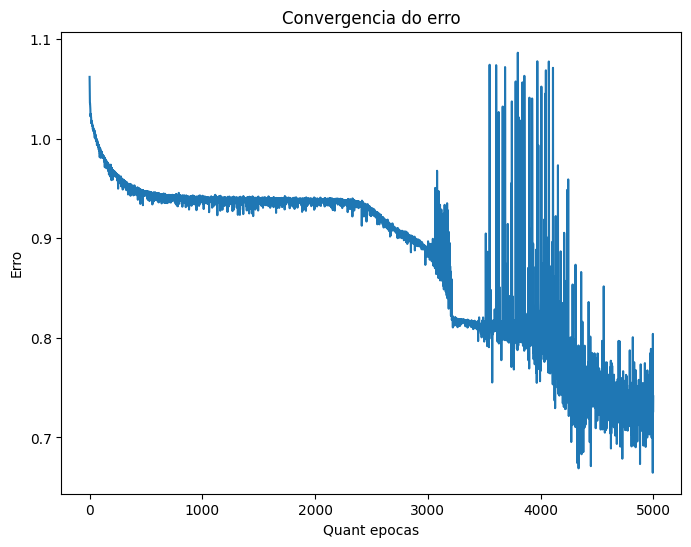

In [93]:
# -------------------------------
# CONVERGENCIA DE ERROS
# -------------------------------
plt.figure(figsize=(8,6))
plt.plot(erro_epocas[:max_epocas])
plt.title("Convergencia do erro")
plt.xlabel("Quant epocas")
plt.ylabel("Erro")
plt.grid
plt.show()


In [94]:
yhat = np.zeros(n_amostras)  # vetor para armazenar predições
for i in range(n_amostras):
    xi = x[i]  # entrada
    # Camada 1
    u1 = xi[0]*w1[0] + xi[1]*w1[1] + xi[2]*w1[2] + xi[3]*w1[3]
    i1 = np.tanh(u1)
    
    u2 = xi[0]*w2[0] + xi[1]*w2[1] + xi[2]*w2[2] + xi[3]*w2[3]
    i2 = np.tanh(u2)
    
    # Camada 2
    u3 = i1*w3[0] + i2*w3[1] + b3
    i3 = np.tanh(u3)
    
    u4 = i1*w4[0] + i2*w4[1] + b4
    i4 = np.tanh(u4)
    
    # Camada de saída
    u5 = i3*w5[0] + i4*w5[1] + b5
    i5 = np.tanh(u5)
    
    # Classificação binária usando threshold 0
    yhat[i] = 1 if i5 >= 0 else -1

# --- Exibir resultados ---
print("Predições:", yhat)

Predições: [-1. -1.  1. -1.  1. -1.  1. -1.  1.  1. -1.  1. -1. -1. -1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]


Acurácia: 80.00%


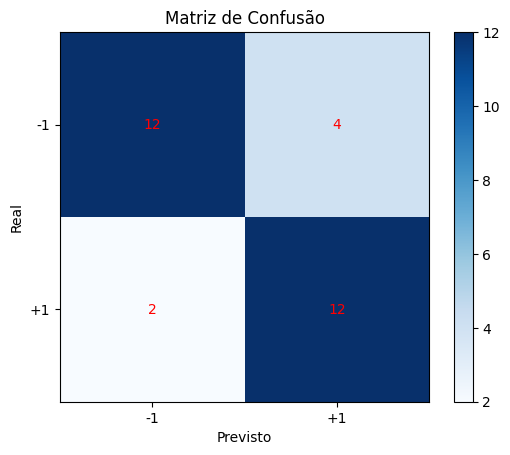

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Exemplo (substitua com seus dados)
n_amostras = len(y)

# Inicializa matriz de confusão 2x2
cm = np.zeros((2, 2), dtype=int)

for i in range(n_amostras):
    real = 0 if y[i] == -1 else 1
    pred = 0 if yhat[i] == -1 else 1
    cm[real, pred] += 1

# Calcula acurácia
acuracia = np.trace(cm) / np.sum(cm)

# Exibe matriz de confusão e acurácia
# print("Matriz de Confusão:\n", cm)
print(f"Acurácia: {acuracia*100:.2f}%")

# --- Plot da matriz de confusão ---
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.colorbar()
plt.xticks([0,1], ["-1","+1"])
plt.yticks([0,1], ["-1","+1"])
plt.xlabel("Previsto")
plt.ylabel("Real")

# Exibir os valores dentro da matriz
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='red')

plt.show()
